# Анализ продаж фармакологической компании (тестовое)

**Цель:** анализ данных продаж и количества диагностируемых пациентов фармкомпании.

**Задачи:**
•	предобработка;
•	анализ.

**Данные:**	продажи фармкомпании; количество диагностированных пациентов.

### Импорт библиотек, первичный обзор данных, предобработка

In [1299]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [1300]:
#загрузка данных
sales = pd.read_excel('C:\\Users\\Дарья\\Desktop\\wink_test\\Russia Data Analyst Data Set_original.xlsx', sheet_name='Sales')
patient_flow = pd.read_excel('C:\\Users\\Дарья\\Desktop\\wink_test\\Russia Data Analyst Data Set_original.xlsx', sheet_name='Patient Flow')

### Продажи 

In [1301]:
#смотрим структуру таблицы
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product Family  5576 non-null   object
 1   Product         5576 non-null   object
 2   Customer        5576 non-null   object
 3   Business Unit   3072 non-null   object
 4   Currency        5576 non-null   object
 5   Date            5576 non-null   object
 6   Sales           5576 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 305.1+ KB


Переименуем столбцы. 

In [1302]:
sales = sales.rename(columns={'Product Family': 'product_family', 'Product': 'product', 'Customer': 'customer', 
                              'Business Unit': 'business_unit', 'Currency': 'currency', 'Date': 'date',
                              'Sales': 'sales'})
sales.columns

Index(['product_family', 'product', 'customer', 'business_unit', 'currency',
       'date', 'sales'],
      dtype='object')

Посмотрим данные

In [1303]:
sales.head(10)

,product_family,product,customer,business_unit,currency,date,sales
0,FAM1,Prd1,Cust1,NaN,M.CHF,2019-05-02 00:00:00,473885
1,FAM1,Prd1,Cust1,NaN,M.CHF,28/02/2019 00:00:00,-23694
2,FAM1,Prd1,Cust1,NaN,M.CHF,29/03/2019 00:00:00,23694
3,FAM1,Prd1,Cust1,NaN,M.CHF,31/03/2019 00:00:00,-23694
4,FAM1,Prd1,Cust1,NaN,M.CHF,15/04/2019 00:00:00,-23694
5,FAM1,Prd1,Cust1,NaN,M.CHF,30/04/2019 00:00:00,23694
6,FAM1,Prd1,Cust1,NaN,M.CHF,29/05/2019 00:00:00,422175
7,FAM1,Prd1,Cust1,NaN,M.CHF,31/05/2019 00:00:00,38821
8,FAM1,Prd1,Cust1,NaN,M.CHF,2019-11-06 00:00:00,-63084
9,FAM1,Prd1,Cust1,NaN,M.CHF,18/06/2019 00:00:00,63084


**Первичный обзор данных**: пропуски в business_unit, тип данных date - object, отрицательные значения в sales. 

Приведем тип данных столбца date к datetime.

In [1304]:
sales['date'] = pd.to_datetime(sales['date'])

Посмотрим на категориальные признаки

In [1305]:
sales['product_family'].unique()

array(['FAM1', 'FAM2', 'FAM3', 'FAM4', 'FAM5', 'FAM6', 'FAM7', 'FAM8',
       'FAM9', 'FAM10', 'FAM11', 'FAM12', 'FAM13', 'FAM14', 'FAM15',
       'FAM16', 'FAM17', 'FAM18', 'FAM19', 'FAM20', 'FAM21', 'FAM22',
       'FAM23', 'FAM24'], dtype=object)

In [1306]:
sales['product_family'].nunique()

24

Имеем 24 уникальных product_family, наименования единообразны, неявных дубликатов не наблюдается.

In [1307]:
sales['product'].unique()

array(['Prd1', 'Prd2', 'Prd3', 'Prd4', 'Prd5', 'Prd6', 'Prd7', 'Prd8',
       'Prd9', 'Prd10', 'Prd11', 'Prd12', 'Prd13', 'Prd14', 'Prd15',
       'Prd16', 'Prd17', 'Prd18', 'Prd19', 'Prd20', 'Prd21', 'Prd22',
       'Prd23', 'Prd24', 'Prd25', 'Prd26', 'Prd27', 'Prd28', 'Prd29',
       'Prd30', 'Prd31', 'Prd32', 'Prd33', 'Prd34', 'Prd35', 'Prd36',
       'Prd37', 'Prd38', 'Prd39', 'Prd40', 'Prd41', 'Prd42', 'Prd43',
       'Prd44', 'Prd45', 'Prd46', 'Prd47', 'Prd48', 'Prd49', 'Prd50',
       'Prd51', 'Prd52', 'Prd53', 'Prd54', 'Prd55', 'Prd56'], dtype=object)

In [1308]:
sales['product'].nunique()

56

Имеем 56 уникальных product, наименования единообразны, неявных дубликатов не наблюдается.

In [1309]:
sales.groupby('product_family').agg({'product':'nunique'}).sort_values('product', ascending=False).reset_index()

,product_family,product
0,FAM1,6
1,FAM11,4
2,FAM8,4
3,FAM10,4
4,FAM21,4
5,FAM3,3
6,FAM12,3
7,FAM13,3
8,FAM7,3
9,FAM2,3


Каждому product_family может соответствовать несколько product.

In [1310]:
sales['customer'].unique()

array(['Cust1', 'Cust2', 'Cust3', 'Cust4', 'Cust5', 'Cust6', 'Cust7',
       'Cust8', 'Cust9', 'Cust10', 'Cust11', 'Cust12', 'Cust13', 'Cust14',
       'Cust15', 'Cust16', 'Cust17', 'Cust18', 'Cust19', 'Cust20',
       'Cust21', 'Cust22', 'Cust23', 'Cust24', 'Cust25', 'Cust26',
       'Cust27', 'Cust28', 'Cust29', 'Cust30', 'Cust31', 'Cust32',
       'Cust33', 'Cust34', 'Cust35', 'Cust36', 'Cust37'], dtype=object)

In [1311]:
sales['customer'].nunique()

37

Имеем 37 уникальных customer, наименования единообразны, неявных дубликатов не наблюдается.

In [1312]:
sales['currency'].unique()

array(['M.CHF', 'M.RUB'], dtype=object)

В currency имеем две валюты: российский рубль и швейцарский франк.

#### Пропуски

In [1313]:
#считаем пропуски
pd.DataFrame(round((sales.isna().mean()*100),1)).style.background_gradient()

,0
product_family,0.000000
product,0.000000
customer,0.000000
business_unit,44.900000
currency,0.000000
date,0.000000
sales,0.000000


Посмотрим на уникальные значения столбца business_unit.

In [1314]:
sales['business_unit'].unique()

array([nan, 'Speciality Business', 'Oncology'], dtype=object)

Проверим, пересекаются ли уникальные клиенты по значениям признака business_unit.

In [1315]:
sales.groupby('business_unit').agg({'customer': 'nunique'}).query('customer>1')

,customer
business_unit,
Oncology,30
Speciality Business,26


Видим, что однозначного соответствия customer-business_unit нет, поэтому заполнить пропуски в business_unit согласно этой логике не получится. Также можно сделать предположение о характере пропусков в business_unit - скорее всего они относятся к типу MCAR (отсутствуют совершенно случайно), т.е. не зависят от наблюдаемых и ненаблюдаемых переменных. Удаление 45% строк с отсутствующими значениями в business_unit точно повлияет на результаты анализа, поэтому пропуски я заменю на unknow.

In [1316]:
#меняем пропуски в business_unit на unknow
sales['business_unit'] = sales['business_unit'].fillna('unknow')

In [1317]:
#проверяем
pd.DataFrame(round((sales.isna().mean()*100),1)).style.background_gradient()

,0
product_family,0.000000
product,0.000000
customer,0.000000
business_unit,0.000000
currency,0.000000
date,0.000000
sales,0.000000


#### Дубликаты

In [1318]:
#полные дубликаты
sales.duplicated().sum()

0

Полные дубликаты отсутствует. Хочется посмотреть на дубликаты по сочетанию нескольких столбцов.

In [1319]:
sales[sales.duplicated(['product_family', 'product', 'customer', 'business_unit', 'currency', 'date'])]

,product_family,product,customer,business_unit,currency,date,sales


Попробуем убрать валюту из этого сочетания.

In [1320]:
sales[sales.duplicated(['product_family', 'product', 'customer', 'business_unit', 'date'])]

,product_family,product,customer,business_unit,currency,date,sales
29,FAM1,Prd1,Cust1,unknow,M.RUB,2019-05-02,28072314
30,FAM1,Prd1,Cust1,unknow,M.RUB,2019-02-28,-1403616
31,FAM1,Prd1,Cust1,unknow,M.RUB,2019-03-29,1403616
32,FAM1,Prd1,Cust1,unknow,M.RUB,2019-03-31,-1403616
33,FAM1,Prd1,Cust1,unknow,M.RUB,2019-04-15,-1403616
...,...,...,...,...,...,...,...
5571,FAM24,Prd56,Cust37,unknow,M.RUB,2019-10-31,0
5572,FAM24,Prd56,Cust37,unknow,M.RUB,2019-11-30,0
5573,FAM24,Prd56,Cust37,unknow,M.RUB,2019-12-31,0
5574,FAM24,Prd56,Cust37,unknow,M.RUB,2020-01-31,0


In [1321]:
sales.groupby(['date','product_family','product','customer']).agg({'sales': 'count'}).reset_index()

,date,product_family,product,customer,sales
0,2019-01-03,FAM10,Prd26,Cust34,2
1,2019-01-03,FAM10,Prd27,Cust34,2
2,2019-01-03,FAM11,Prd30,Cust24,2
3,2019-01-03,FAM11,Prd30,Cust27,2
4,2019-01-03,FAM11,Prd31,Cust27,2
...,...,...,...,...,...
2783,2020-12-03,FAM20,Prd48,Cust12,2
2784,2020-12-03,FAM20,Prd48,Cust23,2
2785,2020-12-03,FAM22,Prd53,Cust12,2
2786,2020-12-03,FAM6,Prd17,Cust12,2


Сразу получаем ровно половину строк-дублей по сочетанию столбцов 'date','product_family','product','customer'. И мы понимаем, что дело тут в currency. Посмотрим подробнее на несколько таких дубликатов.

In [1322]:
sales.query('date=="2019-01-03" & product_family=="FAM10" & product=="Prd26" & customer=="Cust34"')

,product_family,product,customer,business_unit,currency,date,sales
1852,FAM10,Prd26,Cust34,Oncology,M.CHF,2019-01-03,1200
1858,FAM10,Prd26,Cust34,Oncology,M.RUB,2019-01-03,71058


In [1323]:
sales.query('date=="2020-12-03" & product_family=="FAM22" & product=="Prd53" & customer=="Cust12"')

,product_family,product,customer,business_unit,currency,date,sales
5410,FAM22,Prd53,Cust12,Speciality Business,M.CHF,2020-12-03,7503
5434,FAM22,Prd53,Cust12,Speciality Business,M.RUB,2020-12-03,481430


In [1324]:
print('Курс швейцарского франка в январе 2019 г.:', 71058/1200)

Курс швейцарского франка в январе 2019 г.: 59.215


In [1325]:
print('Курс швейцарского франка в декабре 2020 г.:', 481430/7503)

Курс швейцарского франка в декабре 2020 г.: 64.1650006664001


Похоже на то, что в Продажах мы имеем задвоение строк за счет дублирования информации о прадаже в другой валюте. Думаю, что для анализа будет достаточно оставить одну валюту, российский рубль, например.

In [1326]:
sales = sales.query('currency=="M.RUB"')

In [1327]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2788 entries, 29 to 5575
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   product_family  2788 non-null   object        
 1   product         2788 non-null   object        
 2   customer        2788 non-null   object        
 3   business_unit   2788 non-null   object        
 4   currency        2788 non-null   object        
 5   date            2788 non-null   datetime64[ns]
 6   sales           2788 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 174.2+ KB


#### Аномалии

Исследуем на аномальные значения единственный количественный признак в таблице Продаж - sales.

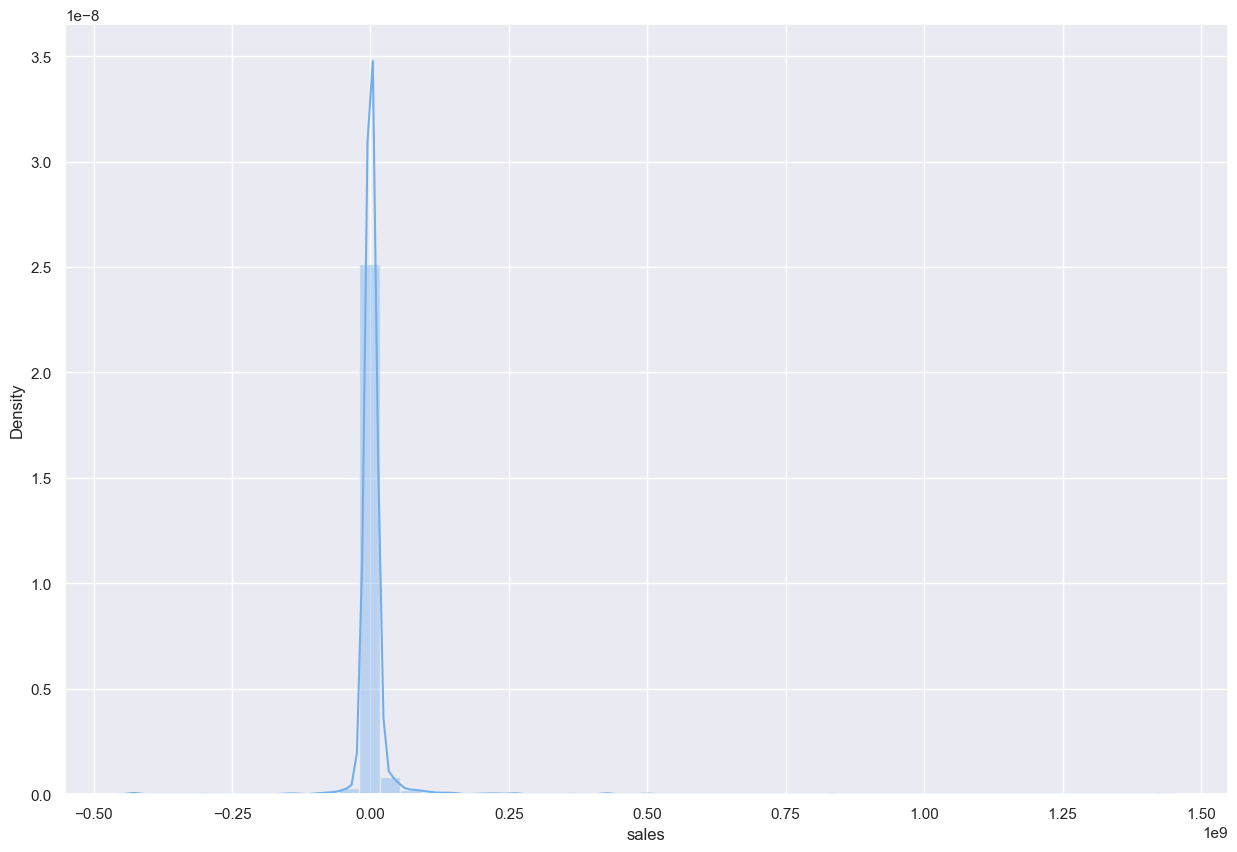

In [1328]:
#график распределения 
warnings.filterwarnings('ignore') # отключаем предупреждения
plt.figure(figsize=(15,10))
sns.distplot(sales['sales'], color="#72AEEB");

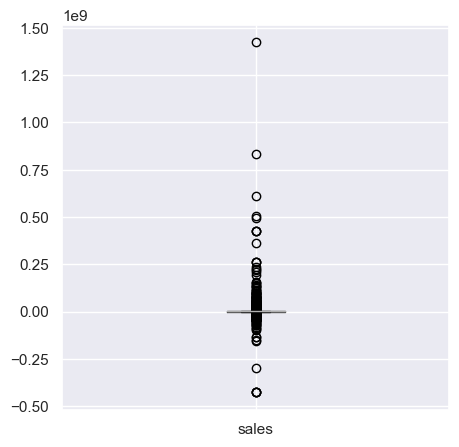

In [1329]:
#выбросы
sales.boxplot('sales', figsize=(5,5));

Хочется принять за аномальные единичные продажи, равные 1.4 млрд., 0.8 млрд. и 0.6 млрд.

In [1330]:
sales = sales[sales['sales'] < 600000000]

In [1331]:
sales['sales'].max()

503654377

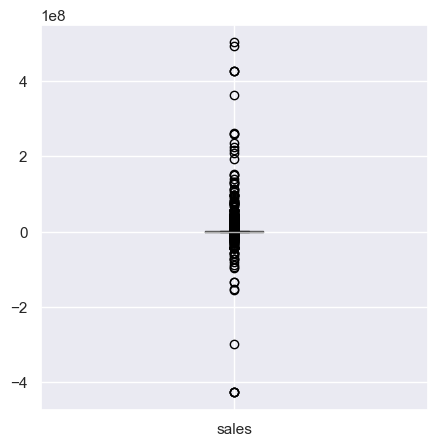

In [1332]:
sales.boxplot('sales', figsize=(5,5));

Кажется, что так распределение выглядит приличнее. 

 #### Нулевые и отрицательные значения в sales

In [1333]:
sales.query('sales < 0')

,product_family,product,customer,business_unit,currency,date,sales
30,FAM1,Prd1,Cust1,unknow,M.RUB,2019-02-28,-1403616
32,FAM1,Prd1,Cust1,unknow,M.RUB,2019-03-31,-1403616
33,FAM1,Prd1,Cust1,unknow,M.RUB,2019-04-15,-1403616
37,FAM1,Prd1,Cust1,unknow,M.RUB,2019-11-06,-3736986
39,FAM1,Prd1,Cust1,unknow,M.RUB,2019-06-25,-1437302
...,...,...,...,...,...,...,...
5534,FAM23,Prd55,Cust30,unknow,M.RUB,2020-02-28,-3525554
5537,FAM23,Prd55,Cust30,unknow,M.RUB,2020-04-30,-6765252
5543,FAM23,Prd55,Cust30,unknow,M.RUB,2020-07-31,-7051108
5563,FAM24,Prd56,Cust37,unknow,M.RUB,2019-03-31,-35799518


In [1334]:
sales.query('sales == 0')

,product_family,product,customer,business_unit,currency,date,sales
44,FAM1,Prd1,Cust1,unknow,M.RUB,2019-10-28,0
46,FAM1,Prd1,Cust1,unknow,M.RUB,2019-11-30,0
48,FAM1,Prd1,Cust1,unknow,M.RUB,2020-01-31,0
49,FAM1,Prd1,Cust1,unknow,M.RUB,2020-02-28,0
54,FAM1,Prd1,Cust1,unknow,M.RUB,2020-05-20,0
...,...,...,...,...,...,...,...
5570,FAM24,Prd56,Cust37,unknow,M.RUB,2019-09-30,0
5571,FAM24,Prd56,Cust37,unknow,M.RUB,2019-10-31,0
5572,FAM24,Prd56,Cust37,unknow,M.RUB,2019-11-30,0
5573,FAM24,Prd56,Cust37,unknow,M.RUB,2019-12-31,0


Отрицательное значение в продажаж может означать возврат, а 0 - подарок (маркетинговую акцию), например. Пока что отмечу, что они есть и что нужно будет их учитывать в зависимости от расчитываемых метрик.

### Пациенты

In [1335]:
#смотрим структуру таблицы
patient_flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product Family      3132 non-null   object        
 1   Product             3132 non-null   object        
 2   Region EN           3132 non-null   object        
 3   Territory EN        3132 non-null   object        
 4   Date                3132 non-null   datetime64[ns]
 5   Diagnosed Patients  3132 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 146.9+ KB


In [1336]:
#переименуем столбцы
patient_flow = patient_flow.rename(columns={'Product Family': 'product_family', 'Product': 'product', 'Region EN': 
                                            'region_EN', 'Territory EN': 'territory_EN', 'Date': 'date', 
                                            'Diagnosed Patients': 'diagnosed_patients'})
patient_flow.columns

Index(['product_family', 'product', 'region_EN', 'territory_EN', 'date',
       'diagnosed_patients'],
      dtype='object')

In [1337]:
#смотрим данные
patient_flow.head(10)

,product_family,product,region_EN,territory_EN,date,diagnosed_patients
0,FAM1,Prd2,Central,Voronezh Oblast,2020-04-14,1
1,FAM1,Prd2,E.Siberia & Far East,Buryatia Republic,2019-07-16,1
2,FAM1,Prd2,E.Siberia & Far East,Irkutsk Oblast,2019-03-18,1
3,FAM1,Prd2,E.Siberia & Far East,Zabaykalsky Oblast,2019-05-18,1
4,FAM1,Prd2,Moscow,Moscow,2019-01-15,1
5,FAM1,Prd2,Moscow,Moscow,2019-03-21,1
6,FAM1,Prd2,Moscow,Moscow,2019-11-19,1
7,FAM1,Prd2,Moscow Region,Moscow Region,2019-01-14,1
8,FAM1,Prd2,Moscow Region,Moscow Region,2019-01-16,2
9,FAM1,Prd2,Moscow Region,Moscow Region,2019-05-14,1


**Первичный обзор данных**: пропусков нет, тип данных соответствуют данным. 

Посмотрим на категориальные признаки.

In [1338]:
patient_flow['product_family'].unique()

array(['FAM1', 'FAM25', 'FAM26', 'FAM10', 'FAM8', 'FAM27'], dtype=object)

In [1339]:
patient_flow['product'].unique()

array(['Prd2', 'Prd6', 'Prd63', 'Prd20', 'Prd21', 'Prd57', 'Prd58',
       'Prd59', 'Prd60', 'Prd61', 'Prd62'], dtype=object)

Признаки product_family и product в Продажах и в Пациентах пересекаются не в полном объеме. 

In [1340]:
patient_flow.groupby('product_family').agg({'product':'nunique'}).sort_values('product', ascending=False).reset_index()

,product_family,product
0,FAM27,7
1,FAM1,2
2,FAM10,1
3,FAM25,1
4,FAM26,1
5,FAM8,1


Так же, как и в Продажах, в Пациентах одному значению product_family может соответствовать несколько значений product

In [1341]:
patient_flow['region_EN'].unique()

array(['Central', 'E.Siberia & Far East', 'Moscow', 'Moscow Region',
       'North-West', 'Southern', 'Ural & W.Siberia', 'Volga'],
      dtype=object)

In [1342]:
patient_flow['region_EN'].nunique()

8

В region_EN имеем 8 уникальных значений, неявных дубликатов нет.

In [1343]:
patient_flow['territory_EN'].unique()

array(['Voronezh Oblast', 'Buryatia Republic', 'Irkutsk Oblast',
       'Zabaykalsky Oblast', 'Moscow', 'Moscow Region',
       'Karelia Republic', 'Saint Petersburg', 'Adygea Republic',
       'Astrakhan Oblast', 'Chechen Republic', 'Crimea Republic',
       'Dagestan Republic', 'Ingushetia Republic',
       'Kabardino-Balkar Republic', 'Krasnodar Oblast',
       'North Ossetia Republic', 'Rostov Oblast', 'Stavropol Oblast',
       'Volgograd Oblast', 'Chelyabinsk Oblast', 'Kurgan Oblast',
       'Omsk Oblast', 'Tyumen Oblast', 'Chuvash Republic',
       'Nizhny Novgorod Oblast', 'Perm Oblast', 'Saratov Oblast',
       'Tatarstan Republic', 'Udmurt Republic', 'Belgorod Oblast',
       'Ivanovo Oblast', 'Kostroma Oblast', 'Tambov Oblast',
       'Krasnoyarsk Oblast', 'Novosibirsk Oblast', 'Arkhangelsk Oblast',
       'Komi Republic', 'Murmansk Oblast', 'Pskov Oblast',
       'Bashkortostan Republic', 'Kirov Oblast', 'Orenburg Oblast',
       'Samara Oblast', 'Kursk Oblast', 'Tula Oblas

In [1344]:
patient_flow['territory_EN'].nunique()

82

В territory_EN 82 территории, неявных дубликатов нет.

#### Дубликаты

In [1345]:
#полные дубликаты
patient_flow.duplicated().sum()

68

In [1346]:
#удаляем
patient_flow.drop_duplicates()

,product_family,product,region_EN,territory_EN,date,diagnosed_patients
0,FAM1,Prd2,Central,Voronezh Oblast,2020-04-14,1
1,FAM1,Prd2,E.Siberia & Far East,Buryatia Republic,2019-07-16,1
2,FAM1,Prd2,E.Siberia & Far East,Irkutsk Oblast,2019-03-18,1
3,FAM1,Prd2,E.Siberia & Far East,Zabaykalsky Oblast,2019-05-18,1
4,FAM1,Prd2,Moscow,Moscow,2019-01-15,1
...,...,...,...,...,...,...
3127,FAM27,Prd63,Volga,Tatarstan Republic,2020-05-19,1
3128,FAM27,Prd63,Volga,Tatarstan Republic,2020-06-01,2
3129,FAM27,Prd63,Volga,Udmurt Republic,2020-05-06,1
3130,FAM27,Prd63,Volga,Udmurt Republic,2020-05-19,1


 ## EDA

Начнем исследования с продуктов. Посмотрим на объемы "движения" продуктов общее, нулевое и возвратное.

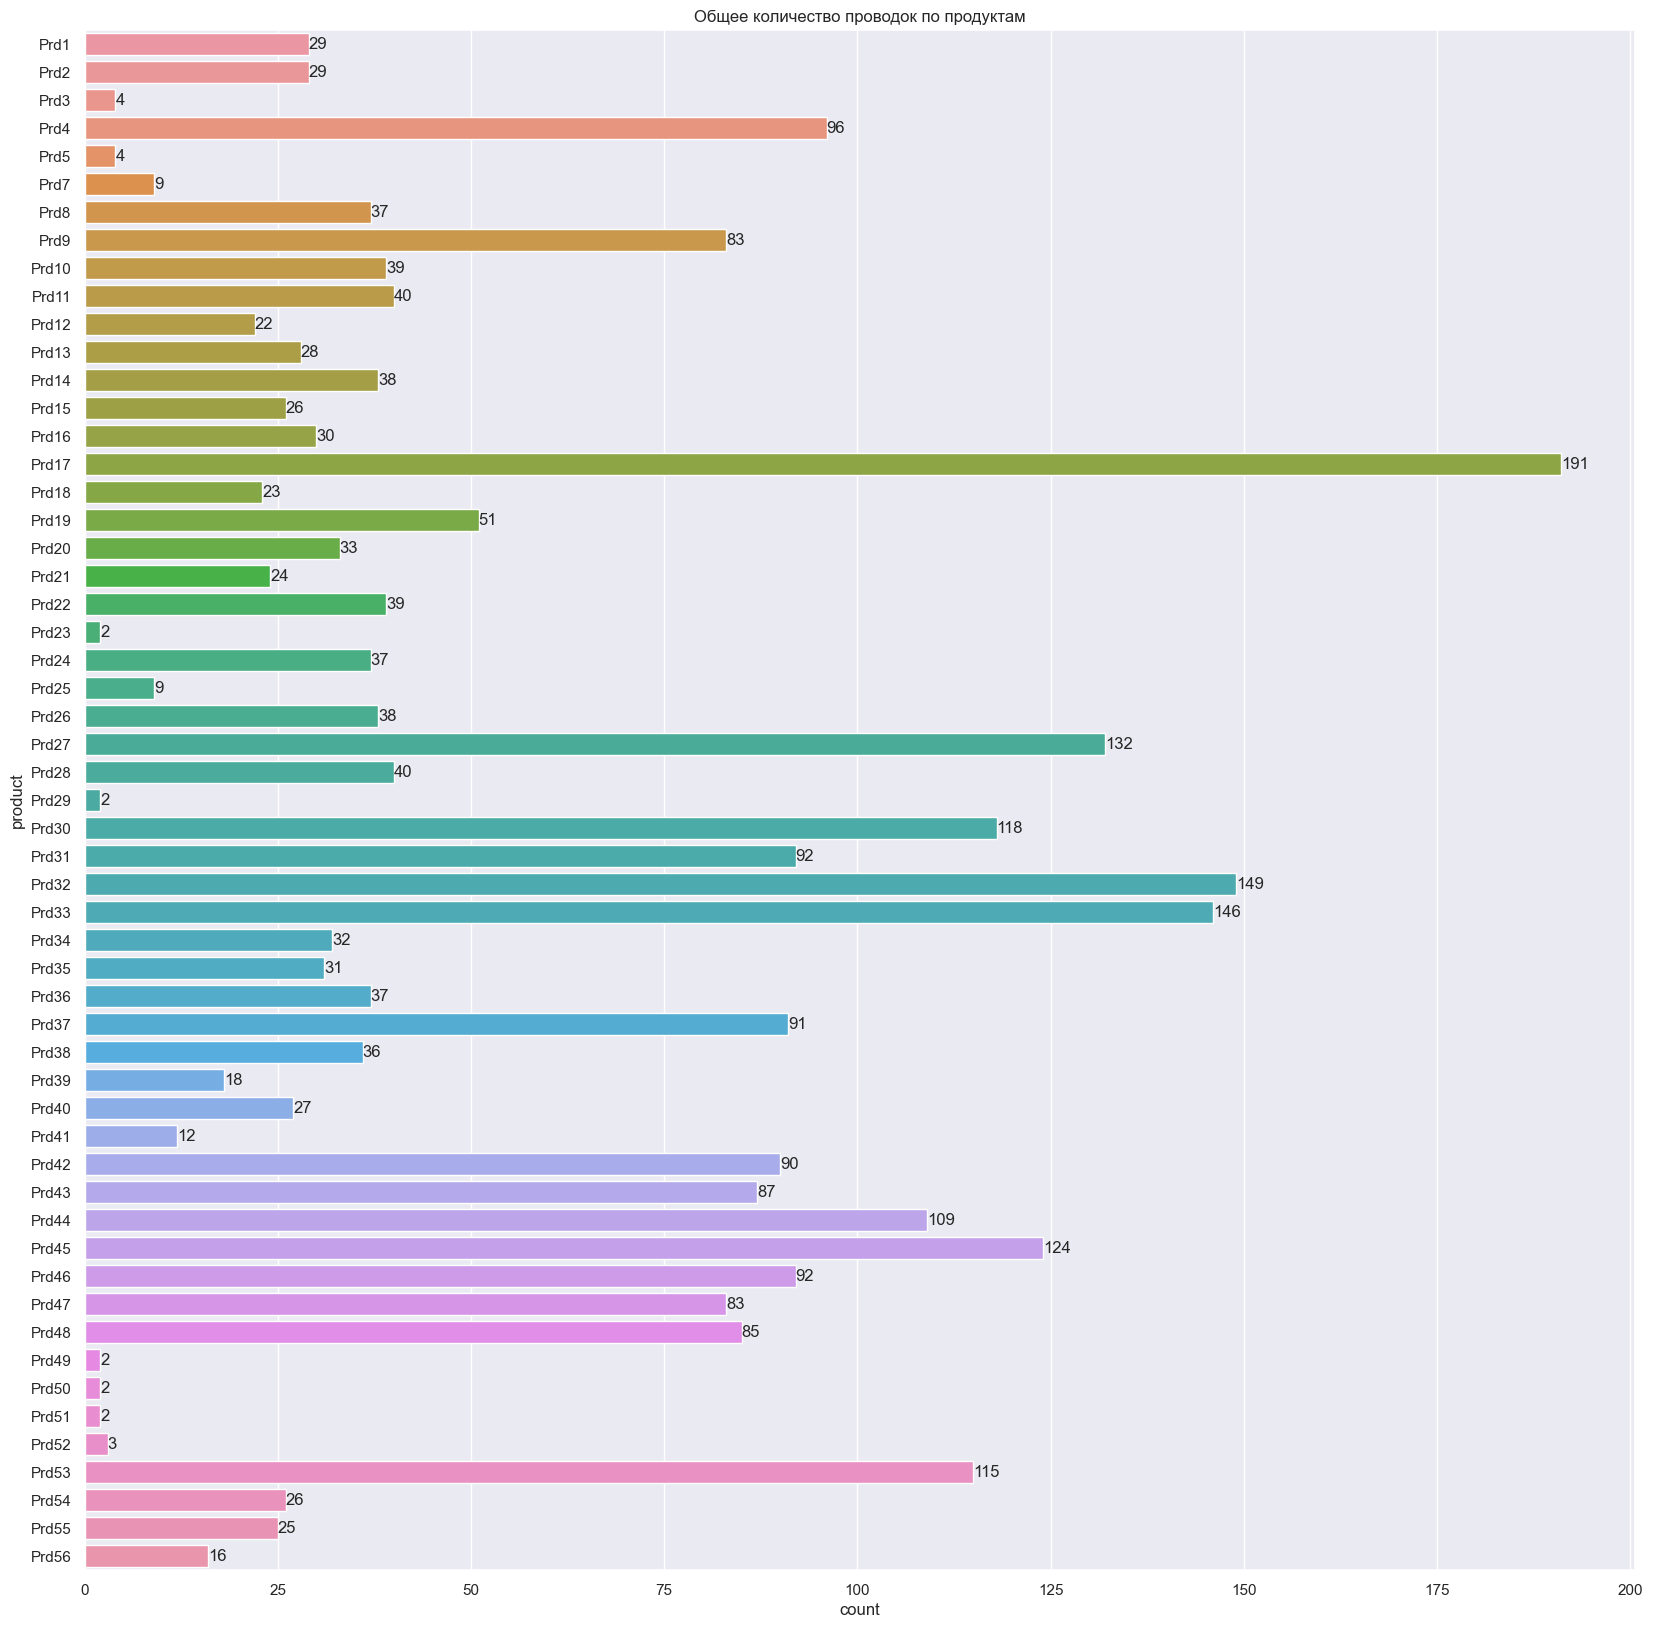

In [1347]:
#количество проводок
plt.figure(figsize=(20,20))
ax = sns.countplot(y = 'product', data = sales)
ax.bar_label(ax.containers[0])
plt.title("Общее количество проводок по продуктам");

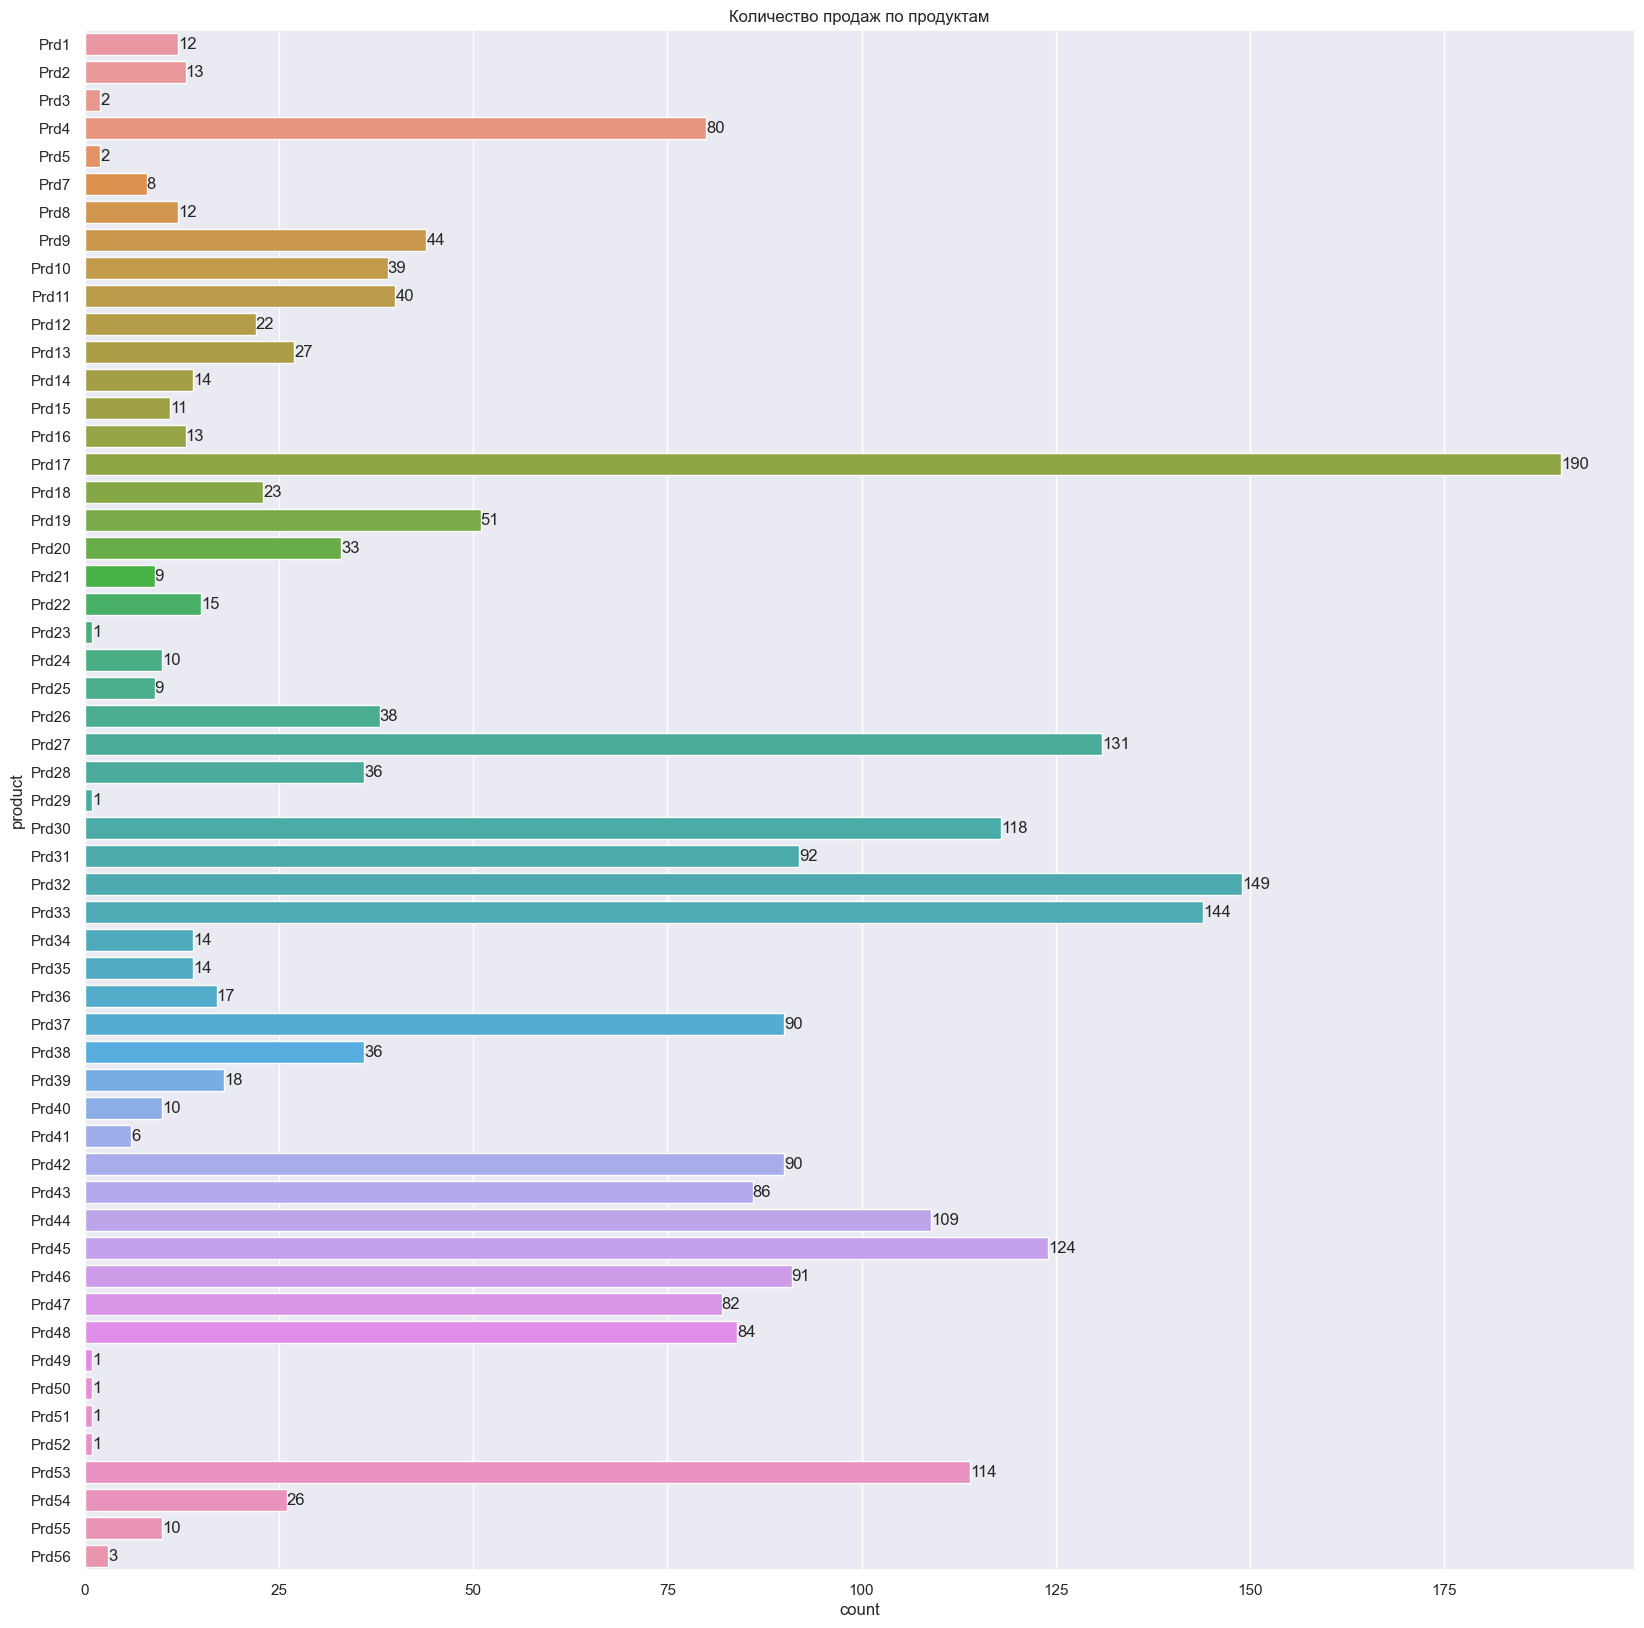

In [1348]:
#количество продаж
plt.figure(figsize=(20,20))
ax = sns.countplot(y = 'product', data = sales[sales['sales']>0])
ax.bar_label(ax.containers[0])
plt.title("Количество продаж по продуктам");

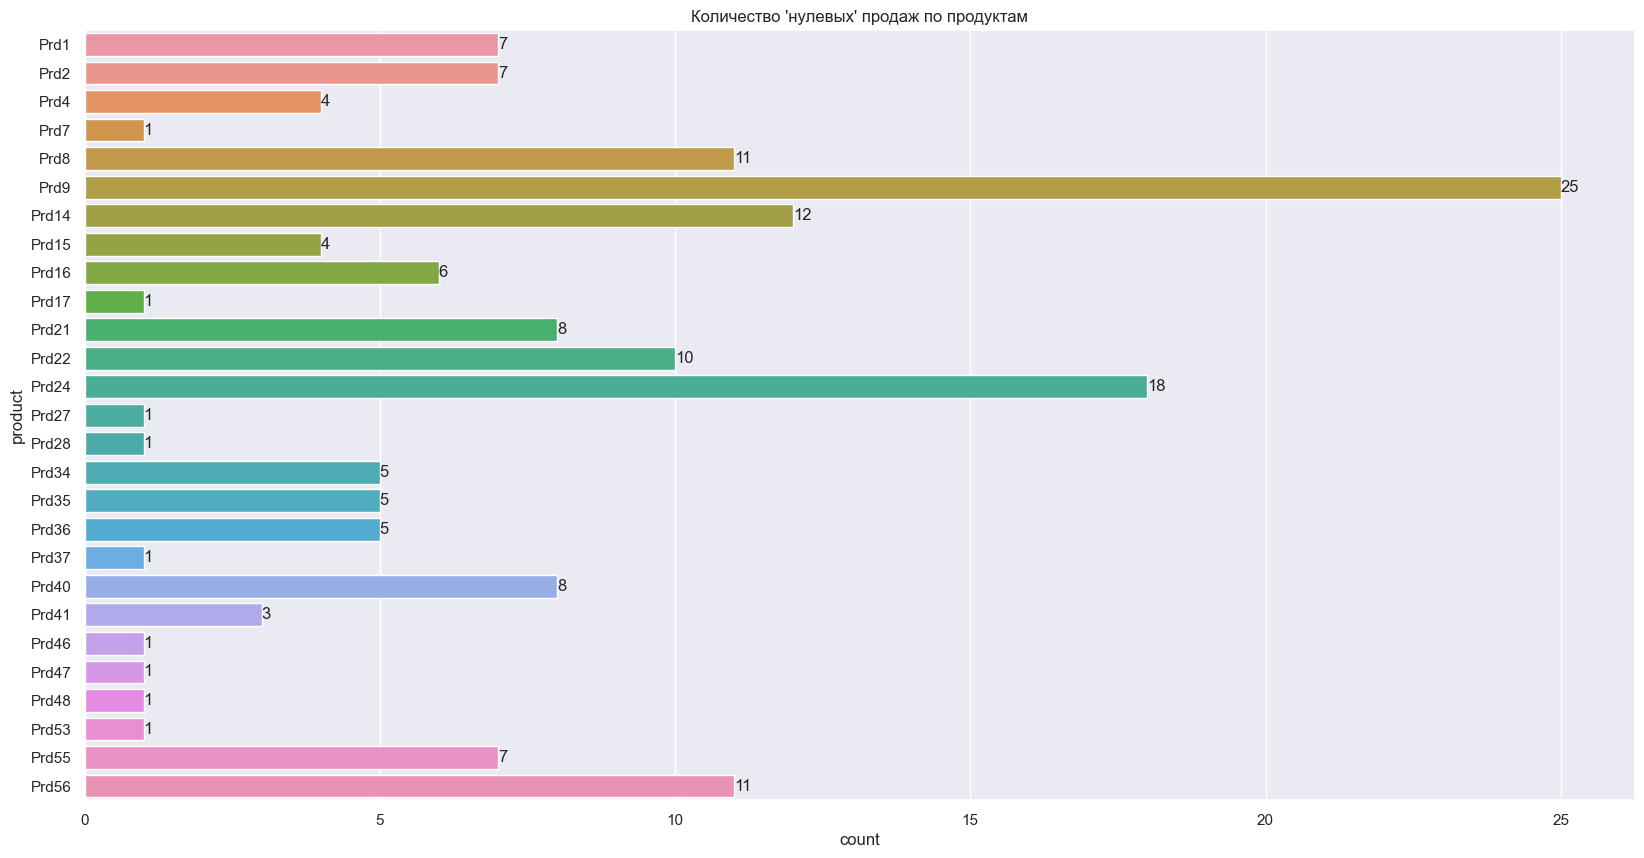

In [1349]:
#количество нулевых проводок
plt.figure(figsize=(20,10))
ax = sns.countplot(y = 'product', data = sales[sales['sales']==0])
ax.bar_label(ax.containers[0])
plt.title("Количество 'нулевых' продаж по продуктам");

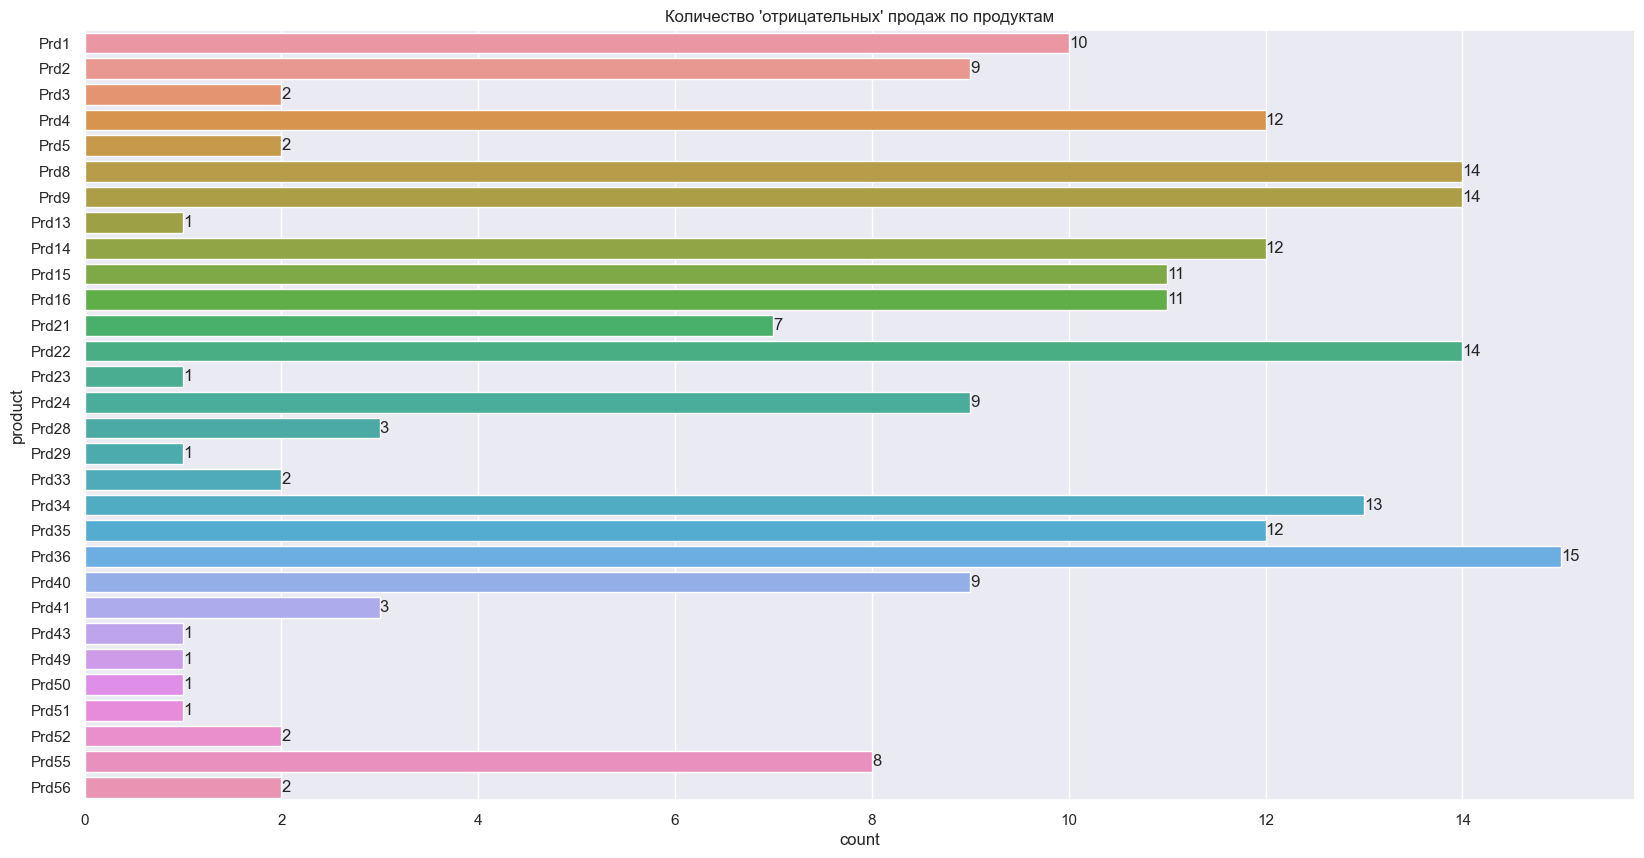

In [1350]:
#количество возвратных проводок
plt.figure(figsize=(20,10))
ax = sns.countplot(y = 'product', data = sales[sales['sales']<0])
ax.bar_label(ax.containers[0])
plt.title("Количество 'отрицательных' продаж по продуктам");

Первое, что "бросается" в вывод: Prd17 - больше всего продаж, нет возвратов и одна нулевая проводка. Или, например, лидер по нулевым "продажам"(25 шт.) - Prd9 - имеет 44 продажи и 14 возвратов. Лидер по возвратам(15 шт.) - Prd36 - имеет всего 17 продаж и 5 нулевых продаж.

Перейдем к клиентам, посчитаем частоту покупок каждого, предварительно убрав нулевые и отрицательные.

In [1351]:
frequence = sales.query('sales>0')['customer'].value_counts()
frequence

Cust12    416
Cust29    334
Cust27    273
Cust3     247
Cust23    161
Cust5     119
Cust30    103
Cust17     96
Cust7      92
Cust9      84
Cust6      77
Cust28     61
Cust24     49
Cust10     48
Cust4      45
Cust1      32
Cust11     32
Cust25     31
Cust26     30
Cust34     20
Cust35     18
Cust31     17
Cust2      14
Cust15      8
Cust8       5
Cust37      3
Cust18      2
Name: customer, dtype: int64

In [1352]:
frequence = pd.DataFrame({'customer':frequence.index,'frequence':frequence.values})
frequence.head()

,customer,frequence
0,Cust12,416
1,Cust29,334
2,Cust27,273
3,Cust3,247
4,Cust23,161


Найдем общую сумму заказов по каждому клиенту (LTV по общему доходу):

In [1353]:
sales_by_total_value_sum = sales.groupby(['customer']).sum().reset_index().sort_values(by='sales', ascending=False)
sales_by_total_value_sum

,customer,sales
23,Cust30,2000120107
0,Cust1,1880878979
3,Cust12,1766931447
19,Cust27,648497031
21,Cust29,520255114
15,Cust23,481769577
22,Cust3,318230675
34,Cust7,194024062
32,Cust5,189780408
11,Cust2,180151217


Найдем даты последних заказов по каждому клиенту, предварительно отфильтровав нулевые и отрицательные продажи.

In [1354]:
sales_by_last_date = sales[sales['sales']>0].sort_values('date').groupby('customer').last().reset_index()
sales_by_last_date

,customer,product_family,product,business_unit,currency,date,sales
0,Cust1,FAM1,Prd2,unknow,M.RUB,2020-12-03,112260424
1,Cust10,FAM13,Prd39,Speciality Business,M.RUB,2020-10-04,1263994
2,Cust11,FAM1,Prd4,Speciality Business,M.RUB,2020-10-06,175298
3,Cust12,FAM13,Prd38,Speciality Business,M.RUB,2020-12-03,24108
4,Cust15,FAM20,Prd48,Speciality Business,M.RUB,2020-08-04,2667925
5,Cust17,FAM11,Prd32,unknow,M.RUB,2020-07-27,58261
6,Cust18,FAM2,Prd9,Oncology,M.RUB,2019-06-17,4289610
7,Cust2,FAM1,Prd5,unknow,M.RUB,2020-12-05,36250792
8,Cust23,FAM20,Prd48,Speciality Business,M.RUB,2020-12-03,31125790
9,Cust24,FAM18,Prd45,unknow,M.RUB,2020-11-06,40769


In [1355]:
#переименуем столбцы
sales_by_last_date = sales_by_last_date.rename(columns={'date': 'last_date'})
sales_by_last_date.columns

Index(['customer', 'product_family', 'product', 'business_unit', 'currency',
       'last_date', 'sales'],
      dtype='object')

In [1356]:
#удалим лишние столбцы
sales_by_last_date = sales_by_last_date[['customer','last_date']]
sales_by_last_date.head()

,customer,last_date
0,Cust1,2020-12-03
1,Cust10,2020-10-04
2,Cust11,2020-10-06
3,Cust12,2020-12-03
4,Cust15,2020-08-04


Соединим фраймы sales_by_total_value_sum и sales_by_last_date

In [1357]:
svo_table = sales_by_total_value_sum.merge(sales_by_last_date, on='customer')
svo_table

,customer,sales,last_date
0,Cust30,2000120107,2020-07-29
1,Cust1,1880878979,2020-12-03
2,Cust12,1766931447,2020-12-03
3,Cust27,648497031,2020-12-02
4,Cust29,520255114,2020-10-07
5,Cust23,481769577,2020-12-03
6,Cust3,318230675,2019-12-18
7,Cust7,194024062,2020-10-07
8,Cust5,189780408,2020-10-07
9,Cust2,180151217,2020-12-05


Добавим к ним ещё frequence

In [1358]:
svo_table = svo_table.merge(frequence, on='customer')
svo_table

,customer,sales,last_date,frequence
0,Cust30,2000120107,2020-07-29,103
1,Cust1,1880878979,2020-12-03,32
2,Cust12,1766931447,2020-12-03,416
3,Cust27,648497031,2020-12-02,273
4,Cust29,520255114,2020-10-07,334
5,Cust23,481769577,2020-12-03,161
6,Cust3,318230675,2019-12-18,247
7,Cust7,194024062,2020-10-07,92
8,Cust5,189780408,2020-10-07,119
9,Cust2,180151217,2020-12-05,14


In [1359]:
sales['date'].min()

Timestamp('2019-01-03 00:00:00')

In [1360]:
sales['date'].max()

Timestamp('2020-12-05 00:00:00')

Здесь можно обратить внимание на пропорции частоты покупок и общей прибыли по топ-клиентам. Например, топ-1 (Cust30) по общей сумме покупок уступает топ-3 (Cust12). Или, например, топ-2 (Cust1) по сумме покупок имеет их частоту в разы меньшую, чем топ-1 и топ-3.

Посчитаем DAU, WAU, MAU — количество уникальных клиентов в день, в неделю, в месяц

In [1361]:
# выделяем год, номер месяца и номер недели из времени начала сессии
sales['sales_year'] = sales['date'].dt.year
sales['sales_month'] = sales['date'].dt.month
sales['sales_week'] = sales['date'].dt.isocalendar().week


sales.head()

,product_family,product,customer,business_unit,currency,date,sales,sales_year,sales_month,sales_week
29,FAM1,Prd1,Cust1,unknow,M.RUB,2019-05-02,28072314,2019,5,18
30,FAM1,Prd1,Cust1,unknow,M.RUB,2019-02-28,-1403616,2019,2,9
31,FAM1,Prd1,Cust1,unknow,M.RUB,2019-03-29,1403616,2019,3,13
32,FAM1,Prd1,Cust1,unknow,M.RUB,2019-03-31,-1403616,2019,3,13
33,FAM1,Prd1,Cust1,unknow,M.RUB,2019-04-15,-1403616,2019,4,16


Сгруппируем данные по дате и неделе, посчитаем количество уникальных пользователей по столбцу customer, найдём среднее.

In [1362]:
dau = (
    sales.groupby('date').agg({'customer': 'nunique'}).mean()
)

wau = (
    sales.groupby(['sales_year', 'sales_week'])
    .agg({'customer': 'nunique'})
    .mean()
)

mau = (
    sales.groupby(['sales_year', 'sales_month'])
    .agg({'customer': 'nunique'})
    .mean()
)
print('Количество уникальных клиентов в день: ',int(dau))
print('Количество уникальных клиентов в неделю: ',int(wau)) 
print('Количество уникальных клиентов в месяц: ',int(mau)) 

Количество уникальных клиентов в день:  2
Количество уникальных клиентов в неделю:  8
Количество уникальных клиентов в месяц:  16


Pегулярность покупок

In [1363]:
print('Регулярность покупок в неделю: ',dau / wau * 100) 
print('Регулярность покупок в месяц: ',dau / mau * 100) 

Регулярность покупок в неделю:  customer    33.5904
dtype: float64
Регулярность покупок в месяц:  customer    17.329488
dtype: float64


Исследуем таблицу Пациенты отдельно, затем присоединим к ней Продажи.

In [1364]:
#количество диагностируемых пациентов в разрезе продуктов
patient_flow.groupby('product').agg({'diagnosed_patients':'sum'}).\
        sort_values('diagnosed_patients', ascending=False).reset_index()

,product,diagnosed_patients
0,Prd21,2383
1,Prd63,1008
2,Prd2,389
3,Prd6,342
4,Prd62,128
5,Prd20,114
6,Prd59,26
7,Prd60,10
8,Prd57,8
9,Prd58,5


Prd21 и Prd63 в ярко-выраженном топ-2 по количеству диагностируемых пациентов. При этом, Prd63 нет в продажах. 

Соединим patient_flow с sales, посмотрим на количество диагностируемых пациентов проданными продуктами.

In [1365]:
df_merge = patient_flow.merge(sales.query('sales>=0'), on=['product_family','product'])
df_merge.head()

,product_family,product,region_EN,territory_EN,date_x,diagnosed_patients,customer,business_unit,currency,date_y,sales,sales_year,sales_month,sales_week
0,FAM1,Prd2,Central,Voronezh Oblast,2020-04-14,1,Cust1,unknow,M.RUB,2019-05-02,140357509,2019,5,18
1,FAM1,Prd2,Central,Voronezh Oblast,2020-04-14,1,Cust1,unknow,M.RUB,2019-03-29,7017875,2019,3,13
2,FAM1,Prd2,Central,Voronezh Oblast,2020-04-14,1,Cust1,unknow,M.RUB,2019-10-04,97688826,2019,10,40
3,FAM1,Prd2,Central,Voronezh Oblast,2020-04-14,1,Cust1,unknow,M.RUB,2019-04-30,7017875,2019,4,18
4,FAM1,Prd2,Central,Voronezh Oblast,2020-04-14,1,Cust1,unknow,M.RUB,2019-05-27,14597181,2019,5,22


In [1366]:
#переименуем столбцы с датами
df_merge = df_merge.rename(columns={'date_x': 'date_diagnosed', 'date_y':'date_sales'})
df_merge.columns

Index(['product_family', 'product', 'region_EN', 'territory_EN',
       'date_diagnosed', 'diagnosed_patients', 'customer', 'business_unit',
       'currency', 'date_sales', 'sales', 'sales_year', 'sales_month',
       'sales_week'],
      dtype='object')

In [1367]:
#удалим ненужные столбцы
df_merge = df_merge[['product_family','product','region_EN',\
                     'territory_EN','date_diagnosed','diagnosed_patients','customer','business_unit','currency','sales', 'date_sales']]
df_merge.head()

,product_family,product,region_EN,territory_EN,date_diagnosed,diagnosed_patients,customer,business_unit,currency,sales,date_sales
0,FAM1,Prd2,Central,Voronezh Oblast,2020-04-14,1,Cust1,unknow,M.RUB,140357509,2019-05-02
1,FAM1,Prd2,Central,Voronezh Oblast,2020-04-14,1,Cust1,unknow,M.RUB,7017875,2019-03-29
2,FAM1,Prd2,Central,Voronezh Oblast,2020-04-14,1,Cust1,unknow,M.RUB,97688826,2019-10-04
3,FAM1,Prd2,Central,Voronezh Oblast,2020-04-14,1,Cust1,unknow,M.RUB,7017875,2019-04-30
4,FAM1,Prd2,Central,Voronezh Oblast,2020-04-14,1,Cust1,unknow,M.RUB,14597181,2019-05-27


In [1368]:
#количество диагностированных пациентов по продуктам тыблицы sales
df_merge.groupby(['product_family','product']).agg({'diagnosed_patients':'sum'})\
                    .sort_values('diagnosed_patients', ascending=False).reset_index()

,product_family,product,diagnosed_patients
0,FAM8,Prd21,40511
1,FAM1,Prd2,7780


Получается, что всего два продукта попали в таблицу с количеством диагностируемых пациентов - это Prd21 и Prd2. При этом количество продиагностированных пациентов продуктом Prd21 много больше, чем Prd2. Посмотрим ещё распределение таких пациентов по регионам.

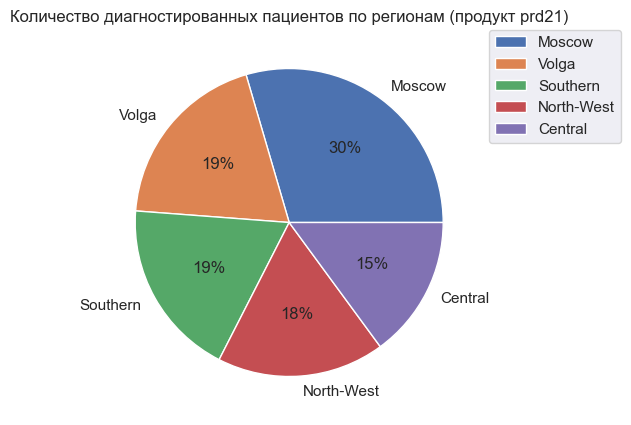

In [1369]:
pivot_reg_prd21 = df_merge[df_merge['product']=='Prd21'].pivot_table(index='region_EN', values='diagnosed_patients', aggfunc='sum').\
                                                            sort_values('diagnosed_patients', ascending=False).head()
pivot_reg_prd21.plot(y='diagnosed_patients', kind='pie', autopct='%1.0f%%', figsize=(5,5))
plt.title("Количество диагностированных пациентов по регионам (продукт prd21)")
plt.ylabel("")
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show;

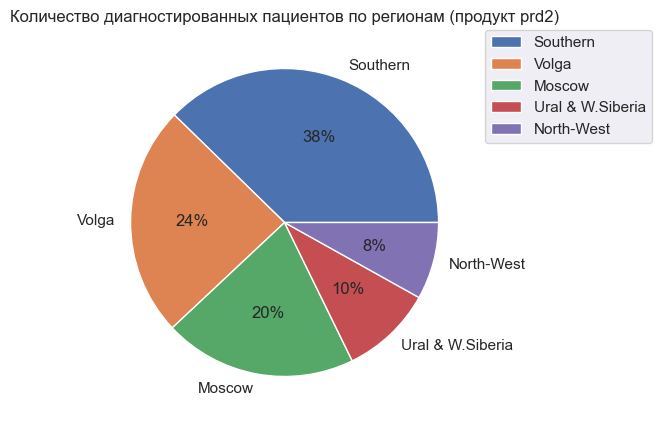

In [1370]:
pivot_reg_prd2 = df_merge[df_merge['product']=='Prd2'].pivot_table(index='region_EN', values='diagnosed_patients', aggfunc='sum').\
                                                            sort_values('diagnosed_patients', ascending=False).head()
pivot_reg_prd2.plot(y='diagnosed_patients', kind='pie', autopct='%1.0f%%', figsize=(5,5))
plt.title("Количество диагностированных пациентов по регионам (продукт prd2)")
plt.ylabel("")
plt.show
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 );

Prd21 чаще использовали в Москве, Prd2 - на Юге. Prd21 не использовали на Урале, Prd2 - в центральных регионах (кроме Москвы).